# ANLY 590 HW1 
###  Prerna Kaul

In [91]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Q 1.1

In [44]:
hitters = pd.read_csv("Hitters.csv", sep = ',')

hitters = hitters.dropna()
#print(hitters.head())


# removing non-numerical columns

#print(hitters.dtypes)
hitters = hitters.drop(["Unnamed: 0", "League", "Division", "NewLeague"], axis = 1)
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [89]:
# data preparation
X = hitters.drop(["Salary"], axis = 1)
Y = hitters["Salary"]

# splitting the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 1001)


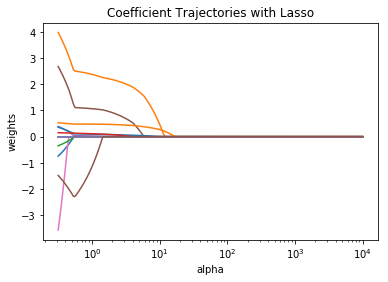

Index(['Hits', 'CRuns', 'CRBI'], dtype='object')
Index(['Hits', 'CRuns', 'CRBI'], dtype='object')
Index(['Hits', 'CRuns', 'CRBI'], dtype='object')
Index(['Hits', 'CRuns', 'CRBI'], dtype='object')
Index(['Hits', 'CRuns', 'CRBI'], dtype='object')
Index(['Hits', 'CRuns', 'CRBI'], dtype='object')
Index(['Hits', 'CRuns', 'CRBI'], dtype='object')
Index(['Hits', 'CRuns', 'CRBI'], dtype='object')
Index(['Hits', 'CRuns', 'CRBI'], dtype='object')
Index(['Hits', 'CRuns', 'CRBI'], dtype='object')


In [90]:
# lasso
lasso = Lasso(max_iter = 10000, normalize = True)
alphas = np.logspace(4, -0.5, 200)
lasso_coefs = []

# fitting lasso for different alpha values
for alpha in alphas:
    lasso.set_params(alpha=alpha)
    lasso.fit(X_train,y_train)
    lasso_coefs.append(lasso.coef_)

# plotting coefficient trajectories
ax = plt.gca()
ax.plot(alphas, lasso_coefs)
ax.set_xscale('log')
plt.title('Coefficient Trajectories with Lasso')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

# to find last 3 coefficients
for i in lasso_coefs:
    while sum(i!=0) == 3: # 3 values True in i ==> 3 coefficients are present
        print(X.columns[i!= 0])
        break

The final 3 variables in the model are: <b>Hits, CRuns and CRBI</b>

In [93]:
# lasso cv
lasso_cv = LassoCV(cv = 10, max_iter = 10000, normalize = True)
lasso_cv.fit(X_train,y_train)
print("Optimal value for regularization penalty is:", lasso_cv.alpha_)

Optimal value for regularization penalty is: 1.9559527911543226


In [102]:
pd.Series(X.columns, lasso_cv.coef_)

 0.000000      AtBat
 2.186071       Hits
 0.000000      HmRun
 0.000000       Runs
 0.000000        RBI
 0.926834      Walks
 0.000000      Years
 0.000000     CAtBat
 0.000000      CHits
 0.000000     CHmRun
 0.080183      CRuns
 0.467375       CRBI
 0.000000     CWalks
 0.077180    PutOuts
-0.000000    Assists
-0.000000     Errors
dtype: object

The variables present in this model are: <b> Hits, Walks, CRBI and PutOuts </b>

## Q 1.2

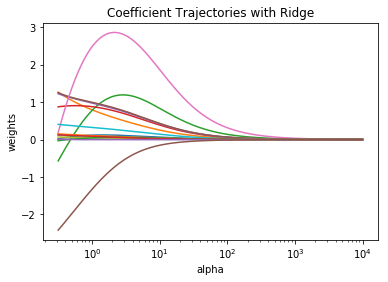

In [106]:
# ridge
ridge = Ridge(max_iter = 10000, normalize = True)
ridge_coefs = []

# fitting lasso for different alpha values
for alpha in alphas:
    ridge.set_params(alpha=alpha)
    ridge.fit(X_train,y_train)
    ridge_coefs.append(ridge.coef_)

# plotting coefficient trajectories
ax = plt.gca()
ax.plot(alphas, ridge_coefs)
ax.set_xscale('log')
plt.title('Coefficient Trajectories with Ridge')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

In [111]:
# ridge cv
ridge_cv = RidgeCV(cv = 10, normalize = True)
ridge_cv.fit(X_train,y_train)
print("Optimal value for regularization penalty is:", ridge_cv.alpha_)

Optimal value for regularization penalty is: 1.0


C:\Users\Prerna Kaul\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [112]:
pd.Series(X.columns, ridge_cv.coef_)

 0.117394      AtBat
 0.794863       Hits
 0.775926      HmRun
 0.879825       Runs
 0.976122        RBI
 0.995772      Walks
 2.481704      Years
 0.010258     CAtBat
 0.049069      CHits
 0.320753     CHmRun
 0.092256      CRuns
 0.104929       CRBI
 0.043253     CWalks
 0.087852    PutOuts
-0.004078    Assists
-1.332664     Errors
dtype: object

## Q 2

Ideal models are supposed to have low bias and low variance. But having both of these conditions at the same time is not possible.Models can either have low bias and high variance or they can have high bias and low variance. There is a trade off between the two. Models with high bias like linear regression will have low variance and there are chances of underfitting the data, whereas models having large variance are highly flexible and hence there are chances of overfitting.

Sometimes, there are too many explanatory variables in the model and some variables may be useless and will likely lead to overfitting problem. Regularization can help reduce number of variables in the model, like lasso forces the coefficients of some variables to become zero in Q1 above. Thus it will reduce variance of the model but at the same time increase bias. For large values of penalty factor the model results into a low variance-highly biased model.